In [ ]:
# In the name of God
# Mohammad Hossein Zehtab
# MFTN - Data Analysis
# 1st Project: Iris Exploratory Data Analysis

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings(action = "ignore")

# Notebook Setting
sns.set()

# Reading Dataset

In [2]:
df = pd.read_csv("Iris_with_outliers.csv")

In [4]:
df.sample(5)

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
44,44,44,5.1,3.8,1.9,0.4,Iris-setosa
113,113,113,5.7,2.8,4.1,1.3,Iris-versicolor
5,5,5,4.6,3.4,1.4,0.3,Iris-setosa
92,92,92,6.3,2.3,4.4,1.3,Iris-versicolor
43,43,43,5.0,3.5,1.6,0.6,Iris-setosa


# Data Preprocassing

In [5]:
# Removing "unnamed" column
df = pd.read_csv("Iris_with_outliers.csv" , index_col=0)

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [7]:
# Removing "Id" column
df = df.drop(labels=["Id"], axis=1)

In [8]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
168,6.8,3.0,5.5,2.1,Iris-virginica
169,6.4,2.7,5.3,1.9,Iris-virginica
170,7.2,3.6,6.1,2.5,Iris-virginica
171,6.3,3.3,6.0,2.5,Iris-virginica
172,6.4,2.7,5.3,0.5,Iris-virginica


In [9]:
# Column renaming
dict = {
    "SepalLengthCm" : "sepal_length",
    "SepalWidthCm" : "sepal_width",
    "PetalLengthCm" : "petal_length",
    "PetalWidthCm" : "petal_width",
    "Species" : "species"
        }
df = df.rename(columns = dict)

In [10]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.0,2.7,5.1,1.6,Iris-versicolor
160,6.4,2.8,5.6,2.2,Iris-virginica
74,5.6,3.0,4.5,1.5,Iris-versicolor
147,6.3,3.4,5.6,2.4,Iris-virginica
138,5.8,2.8,5.1,2.4,Iris-virginica


In [11]:
# Assign numeric target
# Getting unique flower species array
unique_flower_species_arr = df["species"].unique()

# Making a pandas serie for numerical flower species target
unique_flower_species_lst = list(unique_flower_species_arr)
numeric_fs_series = df["species"].apply(lambda specy : unique_flower_species_lst.index(specy))

# Assigning fs_series to the df
df = df.assign(species_index_target = numeric_fs_series)

In [12]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_index_target
5,4.6,3.4,1.4,0.3,Iris-setosa,0
103,5.1,2.5,3.0,1.1,Iris-versicolor,1
2,4.9,3.1,1.5,0.1,Iris-setosa,0
24,5.7,3.8,1.7,0.3,Iris-setosa,0
157,6.5,3.0,5.2,2.0,Iris-virginica,2


In [13]:
# Removing prefix "iris-" from "species" column
df = df.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], ["setosa", "versicolor", "virginica"])

In [14]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_index_target
131,6.4,2.8,5.6,2.1,virginica,2
30,4.8,3.0,1.4,0.1,setosa,0
116,7.3,2.9,6.3,1.8,virginica,2
62,6.7,3.1,4.4,1.4,versicolor,1
13,5.4,3.7,1.5,0.2,setosa,0


In [15]:
# Verifying results for each specy
# setosa
df_setosa = df.query(expr = "species == 'setosa'")
print("The dimension of setosa specy:", df_setosa.shape)
df_setosa.sample(5)

The dimension of setosa specy: (61, 6)


,sepal_length,sepal_width,petal_length,petal_width,species,species_index_target
47,4.6,3.2,1.4,0.2,setosa,0
39,4.4,3.0,1.3,0.2,setosa,0
11,4.8,3.4,1.6,0.2,setosa,0
10,4.9,3.0,1.4,0.2,setosa,0
44,5.1,3.8,1.9,0.4,setosa,0


In [16]:
# Verifying results for each specy
# versicolor
df_versicolor = df.query(expr = "species == 'versicolor'")
print("The dimension of versicolor specy:", df_versicolor.shape)
df_versicolor.sample(5)

The dimension of versicolor specy: (55, 6)


,sepal_length,sepal_width,petal_length,petal_width,species,species_index_target
112,5.1,2.5,3.0,1.1,versicolor,1
80,6.0,2.9,4.5,1.5,versicolor,1
105,5.5,2.4,3.8,1.1,versicolor,1
106,5.4,3.0,4.5,1.5,versicolor,1
71,6.9,3.1,4.9,1.5,versicolor,1


In [17]:
# Verifying results for each specy
# virginica
df_virginica = df.query(expr = "species == 'virginica'")
print("The dimension of virginica specy:", df_virginica.shape)
df_virginica.sample(5)

The dimension of virginica specy: (57, 6)


,sepal_length,sepal_width,petal_length,petal_width,species,species_index_target
152,5.8,2.7,5.1,1.9,virginica,2
150,6.7,3.1,5.6,2.4,virginica,2
162,5.8,2.8,5.1,NaN,virginica,2
127,6.4,2.8,5.6,2.2,virginica,2
129,7.4,2.8,6.1,1.9,virginica,2


In [18]:
# Dimentions for each specy
print("Dataframe Dimention:", df.shape)
print("Setosa Dimention:", df_setosa.shape)
print("Versicolor Dimention:", df_versicolor.shape)
print("Virginica Dimention:", df_virginica.shape)

Dataframe Dimention: (173, 6)
Setosa Dimention: (61, 6)
Versicolor Dimention: (55, 6)
Virginica Dimention: (57, 6)


In [19]:
# Column reindexing
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
numerical_target = ["species_index_target"]
categorical_target = ["species"]
df = df.reindex(columns = features + numerical_target + categorical_target)

In [20]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
168,6.8,3.0,5.5,2.1,2,virginica
169,6.4,2.7,5.3,1.9,2,virginica
170,7.2,3.6,6.1,2.5,2,virginica
171,6.3,3.3,6.0,2.5,2,virginica
172,6.4,2.7,5.3,0.5,2,virginica


# Data Processing

In [21]:
# Getting information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sepal_length          170 non-null    float64
 1   sepal_width           172 non-null    float64
 2   petal_length          169 non-null    float64
 3   petal_width           171 non-null    float64
 4   species_index_target  173 non-null    int64  
 5   species               173 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


## Handling missing values

In [22]:
# Which columns have missing value?
df.isnull().any()

sepal_length             True
sepal_width              True
petal_length             True
petal_width              True
species_index_target    False
species                 False
dtype: bool

In [23]:
# Which rows have missing value?
mask = df.isnull().any(axis=1)
df.query(expr="@mask == True")

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
50,5.1,3.8,NaN,0.2,0,setosa
51,NaN,3.7,1.5,0.4,0,setosa
52,5.3,3.7,NaN,0.2,0,setosa
53,4.6,NaN,1.4,0.3,0,setosa
54,4.4,3.0,1.3,NaN,0,setosa
59,NaN,2.3,1.3,0.3,0,setosa
99,6.3,3.3,NaN,1.6,1,versicolor
110,NaN,2.9,4.5,1.5,1,versicolor
114,6.1,2.9,NaN,1.4,1,versicolor
162,5.8,2.8,5.1,NaN,2,virginica


In [24]:
# Filling missing values with your strategy
features = list(df.columns)[:4]
df_sans_miss_vals = df.copy()

for feature in features:
    mean = df_sans_miss_vals[feature].mean()
    df_sans_miss_vals[feature].fillna(value = round(mean,1), inplace=True)
df_sans_miss_vals.query(expr = "index == 52")

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
52,5.3,3.7,3.7,0.2,0,setosa


In [25]:
# Checking if there is any more missing values
mask = df_sans_miss_vals.isnull().any(axis=1)
df_sans_miss_vals.query(expr="@mask == True")

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species


In [26]:
# Manual verification of handling missing values
df_sans_miss_vals.query(expr = "index == 53")

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
53,4.6,3.1,1.4,0.3,0,setosa


In [27]:
# Checking if there is any more missing values
df_sans_miss_vals.isnull().any()

sepal_length            False
sepal_width             False
petal_length            False
petal_width             False
species_index_target    False
species                 False
dtype: bool

## Handling duplicates

In [28]:
# Is there any duplicated rows?
df_sans_miss_vals.duplicated().any()

True

In [30]:
# Number of duplicated rows
df_sans_miss_vals.duplicated().sum()

12

In [31]:
# Identifying duplicated rows
mask = df_sans_miss_vals.duplicated()
duplicated_rows = df_sans_miss_vals.query("@mask == True")
duplicated_rows

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
29,5.2,3.4,1.4,0.2,0,setosa
35,4.9,3.1,1.5,0.1,0,setosa
38,4.9,3.1,1.5,0.1,0,setosa
48,5.0,3.5,1.3,0.3,0,setosa
55,5.0,3.5,1.6,0.6,0,setosa
112,5.1,2.5,3.0,1.1,1,versicolor
152,5.8,2.7,5.1,1.9,2,virginica
156,6.3,2.7,4.9,1.8,2,virginica
158,6.2,3.4,5.4,2.3,2,virginica
160,6.4,2.8,5.6,2.2,2,virginica


In [32]:
# Validating duplicated rows
df_sans_miss_vals.query("sepal_length == 4.9")

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
2,4.9,3.1,1.5,0.1,0,setosa
10,4.9,3.0,1.4,0.2,0,setosa
35,4.9,3.1,1.5,0.1,0,setosa
38,4.9,3.1,1.5,0.1,0,setosa
66,4.9,2.4,3.3,1.0,1,versicolor
119,4.9,2.5,4.5,1.7,2,virginica


In [33]:
# Dropping duplicated rows
df_sans_duplicated = df_sans_miss_vals.drop_duplicates()

In [34]:
df_sans_duplicated.head()

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.7,3.2,1.6,0.2,0,setosa
2,4.9,3.1,1.5,0.1,0,setosa
3,4.4,2.9,1.4,0.2,0,setosa
4,5.0,3.4,1.5,0.2,0,setosa


In [35]:
# Checking if duplicated rows are droped
df_sans_miss_vals.shape[0] == df_sans_duplicated.shape[0] + duplicated_rows.shape[0]

True

# Data Analysis through Data Visualization and Descriptive Statistics

## Measures of center 

In [36]:
# Getting numeric dataframe
df_numeric = df_sans_duplicated.iloc[:, :4]

In [37]:
df_numeric.tail()

,sepal_length,sepal_width,petal_length,petal_width
168,6.8,3.0,5.5,2.1
169,6.4,2.7,5.3,1.9
170,7.2,3.6,6.1,2.5
171,6.3,3.3,6.0,2.5
172,6.4,2.7,5.3,0.5


In [38]:
# Mean of numeric columns
df_numeric.mean()

sepal_length    5.840994
sepal_width     3.065839
petal_length    3.727950
petal_width     1.170186
dtype: float64

In [39]:
# Median of numeric columns
df_numeric.median()

sepal_length    5.8
sepal_width     3.0
petal_length    4.2
petal_width     1.3
dtype: float64

In [40]:
# Mode of numeric columns
# df_numeric.mode()
for feature in df_sans_duplicated:
    print(f"The most frequent value(s) in '{feature}' column is:\n{df_sans_duplicated[feature].mode()}")
    print()
    print("="*60)

The most frequent value(s) in 'sepal_length' column is:
0    5.0
1    5.1
2    5.8
3    6.3
Name: sepal_length, dtype: float64

The most frequent value(s) in 'sepal_width' column is:
0    3.0
Name: sepal_width, dtype: float64

The most frequent value(s) in 'petal_length' column is:
0    1.5
Name: petal_length, dtype: float64

The most frequent value(s) in 'petal_width' column is:
0    0.2
Name: petal_width, dtype: float64

The most frequent value(s) in 'species_index_target' column is:
0    0
Name: species_index_target, dtype: int64

The most frequent value(s) in 'species' column is:
0    setosa
Name: species, dtype: object



**Insight:**
- For 'petal length', because the median value is more than the mean value, there could be negative skewness.

## Measures of spread

In [41]:
# Getting the range of values for each column
for feature in df_numeric:
    lowest_value = df_numeric[feature].min()
    highest_value = df_numeric[feature].max()
    column_range = highest_value - lowest_value
    print(f"The lowest value for '{feature}' column is: {lowest_value}")
    print(f"The highest value for '{feature}' column is: {highest_value}")
    print(f"The range of values for '{feature}' column is: {round(column_range, 2)}")
    print()

The lowest value for 'sepal_length' column is: 4.3
The highest value for 'sepal_length' column is: 8.0
The range of values for 'sepal_length' column is: 3.7

The lowest value for 'sepal_width' column is: 2.0
The highest value for 'sepal_width' column is: 4.4
The range of values for 'sepal_width' column is: 2.4

The lowest value for 'petal_length' column is: 1.0
The highest value for 'petal_length' column is: 6.9
The range of values for 'petal_length' column is: 5.9

The lowest value for 'petal_width' column is: 0.1
The highest value for 'petal_width' column is: 2.5
The range of values for 'petal_width' column is: 2.4



**Insight:**
- For 'petal length', data are dispersed in a wide range.

In [42]:
# Getting variance, standard deviation, mean and coefficient of variation for each column
print("="*70)
for feature in df_numeric:
    variance = df_numeric[feature].var()
    sigma = df_numeric[feature].std()
    ave = df_numeric[feature].mean()
    cv = sigma / ave
    print()
    print(f"The variance of '{feature}' column is: {round(variance, 2)}")
    print(f"The standard deviation of '{feature}' column is: {round(sigma, 2)}")
    print(f"The mean of '{feature}' column is: {round(ave, 2)}")
    print(f"The coefficient of variation of '{feature}' column is: {round(cv, 2)}")
    print()
    print("="*70)


The variance of 'sepal_length' column is: 0.7
The standard deviation of 'sepal_length' column is: 0.84
The mean of 'sepal_length' column is: 5.84
The coefficient of variation of 'sepal_length' column is: 0.14


The variance of 'sepal_width' column is: 0.2
The standard deviation of 'sepal_width' column is: 0.45
The mean of 'sepal_width' column is: 3.07
The coefficient of variation of 'sepal_width' column is: 0.15


The variance of 'petal_length' column is: 3.03
The standard deviation of 'petal_length' column is: 1.74
The mean of 'petal_length' column is: 3.73
The coefficient of variation of 'petal_length' column is: 0.47


The variance of 'petal_width' column is: 0.57
The standard deviation of 'petal_width' column is: 0.75
The mean of 'petal_width' column is: 1.17
The coefficient of variation of 'petal_width' column is: 0.64



**Insight:**
- 'sepal length' data have almost 14% dispersion around the mean.
- 'sepal width' data have almost 15% dispersion around the mean.
- 'petal length' data have almost 47% dispersion around the mean.
- 'petal width' data have almost 64% dispersion around the mean.

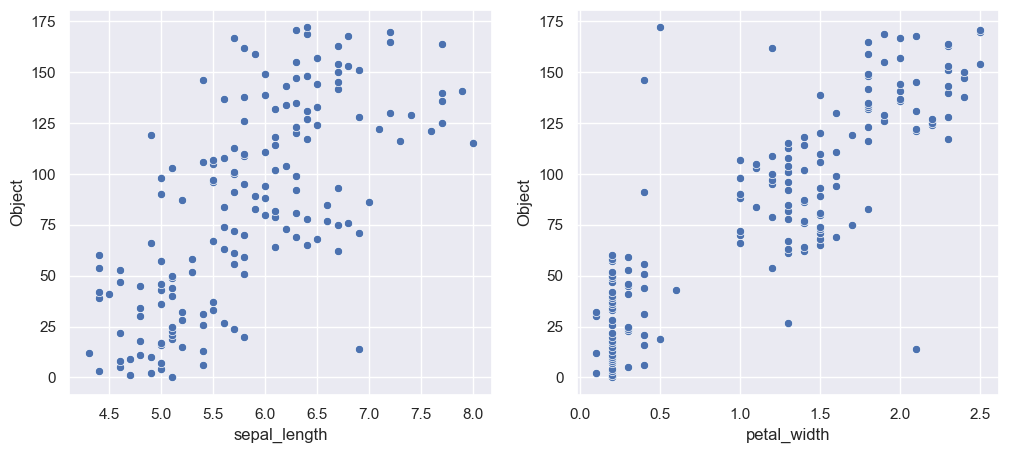

In [44]:
# For more understanding of cv values
plt.figure(figsize=[12,5])

plt.subplot(121)
sns.scatterplot(
    data=df_numeric,
    x="sepal_length",
    y=df_numeric.index
                )
plt.ylabel("Object")

plt.subplot(122)
sns.scatterplot(
    data=df_numeric,
    x="petal_width",
    y=df_numeric.index
                )
plt.ylabel("Object")

plt.show()

## Describe Dataframe

In [149]:
# Describe Dataframe
(df_sans_duplicated
 .describe()
 .style
 .set_caption("Statistic summary of the dataframe")
 .background_gradient(cmap="Accent")
 .format(precision=2)
 .set_properties(**{"border" : "2px dashed crimson", "color" : "black"})
)

,sepal_length,sepal_width,petal_length,petal_width,species_index_target
count,161.00,161.00,161.00,161.00,161.00
mean,5.84,3.07,3.73,1.17,0.97
std,0.84,0.45,1.74,0.75,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.20,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,8.00,4.40,6.90,2.50,2.00


**Insight:**
- There are 161 data in this dataframe.
- The amount of mean and median are almost equal for all the features except 'petal length', in which we can see negative skewness.
- 'petal length' data have a wide range of 5.9

## Skewness of Box Plots

In [150]:
# Find skewness function
def find_skewness(dataframe, feature_name: str) -> None:
    """ Using q1, q2 and q3 quartiles for a specific feature, determines type of skewness and draw box plot."""

    mean = dataframe[feature_name].mean()
    median = dataframe[feature_name].median()

    q1 = dataframe[feature_name].quantile(0.25)
    q2 = dataframe[feature_name].quantile(0.5)
    q3 = dataframe[feature_name].quantile(0.75)

    print(f"The mean of '{feature_name}' is {mean}")
    print(f"The median of '{feature_name}' is {median}")

    if q2-q1 == q3-q2:    # median == mean
        print(f"median == mean: {median == mean}")
        print("Normal Distribution")
    elif q2-q1 > q3-q2:    # median > mean
        print(f"median > mean: {median > mean}")
        print("Negative Skewness")
    else: # q2-q1 < q3-q2   # median < mean
        print(f"median < mean: {median < mean}")
        print("Positive Skewness")
    print()

    sns.boxplot(data=dataframe, x=feature_name)
    plt.show()
    print()

The mean of 'sepal_length' is 5.840993788819875
The median of 'sepal_length' is 5.8
median > mean: False
Negative Skewness



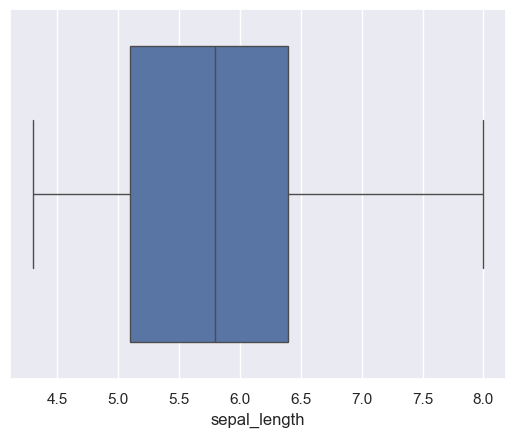


The mean of 'sepal_width' is 3.06583850931677
The median of 'sepal_width' is 3.0
median < mean: True
Positive Skewness



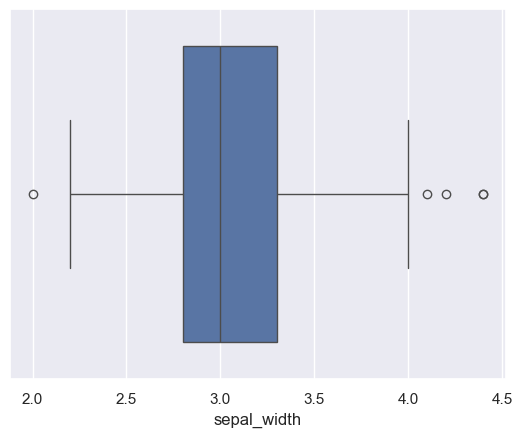


The mean of 'petal_length' is 3.7279503105590064
The median of 'petal_length' is 4.2
median > mean: True
Negative Skewness



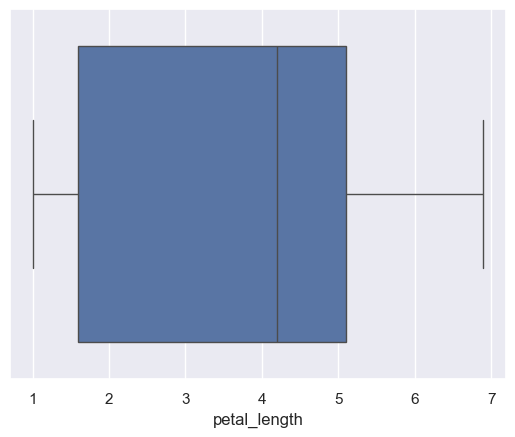


The mean of 'petal_width' is 1.170186335403727
The median of 'petal_width' is 1.3
median > mean: True
Negative Skewness



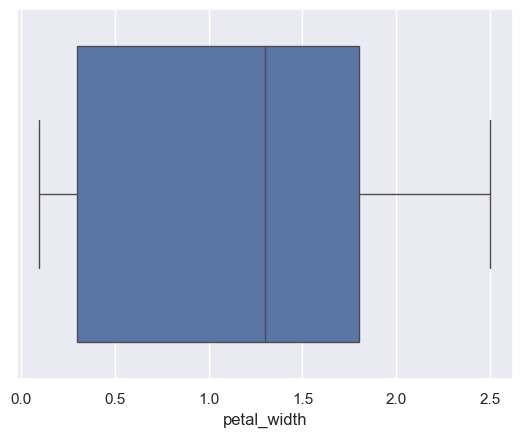

In [48]:
# Calling find_skewness function for each feature
for column in df_numeric.columns:
    find_skewness(dataframe=df_numeric, feature_name=column)

**Here we can see:**
- Nearly normal distribution for 'sepal_length' and 'sepal_width'.
- There are some outliers in 'sepal_width' data.
- Negative skewness for 'petal_length' and 'petal_width'.

## Are Data Balanced?

In [49]:
# 1st way
data_balance_checking1 = df_sans_duplicated.value_counts(subset=["species"])
data_balance_checking1

species   
setosa        56
versicolor    54
virginica     51
Name: count, dtype: int64

In [50]:
# 2nd way
from collections import Counter
data_balance_checking2 = Counter(df_sans_duplicated["species"])
data_balance_checking2

Counter({'setosa': 56, 'versicolor': 54, 'virginica': 51})

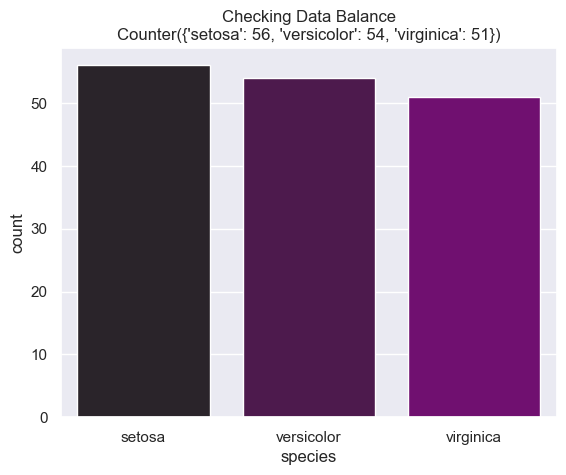

In [51]:
# Data balance count plot
sns.countplot(data=df_sans_duplicated, x="species", hue="species", color="purple")
plt.title(f"Checking Data Balance\n{data_balance_checking2}")
plt.show()

**Insight:**
- Data count is nearly balanced

## Relation Between Features

### Using scatterplot

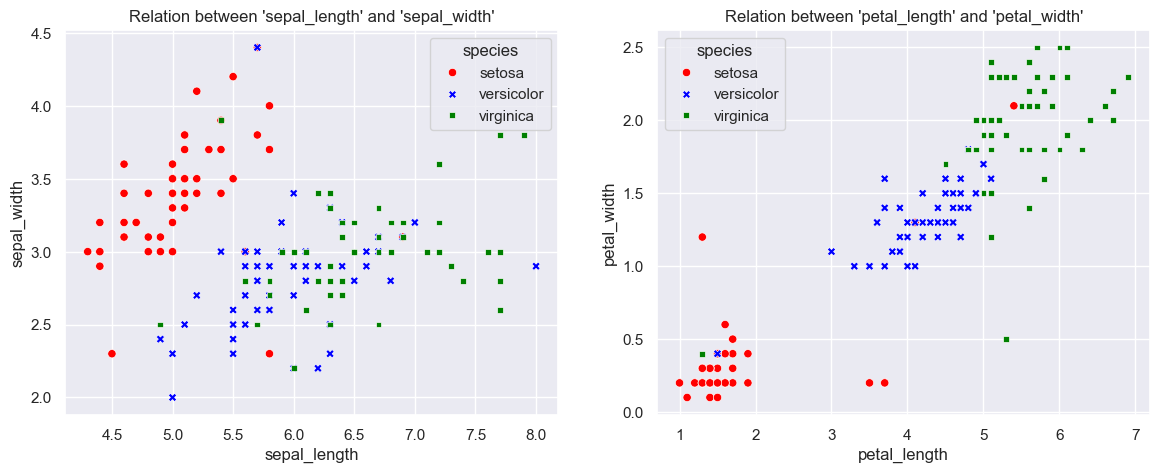

In [52]:
fig = plt.figure(figsize=[14, 5])

# Relation between 'sepal_length' and 'sepal_width'
plt.subplot(121)
sns.scatterplot(
    data=df_sans_duplicated,
    x="sepal_length",
    y="sepal_width",
    hue="species",
    style="species",
    palette=["red", "blue", "green"]
)
plt.title("Relation between 'sepal_length' and 'sepal_width'")

# Relation between 'petal_length' and 'petal_width'
plt.subplot(122)
sns.scatterplot(
    data=df_sans_duplicated,
    x="petal_length",
    y="petal_width",
    hue="species",
    style="species",
    palette=["red", "blue", "green"]
)
plt.title("Relation between 'petal_length' and 'petal_width'")

plt.show()

**Insight:**
- 'Setosa' specy is separated from the other two.
- Linear dependency can be observed between 'versicolor' and 'virginica'.
- Outliers can be seen.

### Using Pairplot

In [53]:
# Choosing features for pairplot
df_sans_duplicated.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
87,5.2,2.7,3.9,1.4,1,versicolor
104,6.2,2.9,4.3,1.3,1,versicolor
78,6.4,2.9,4.3,1.3,1,versicolor
99,6.3,3.3,3.7,1.6,1,versicolor
144,6.5,3.2,5.1,2.0,2,virginica


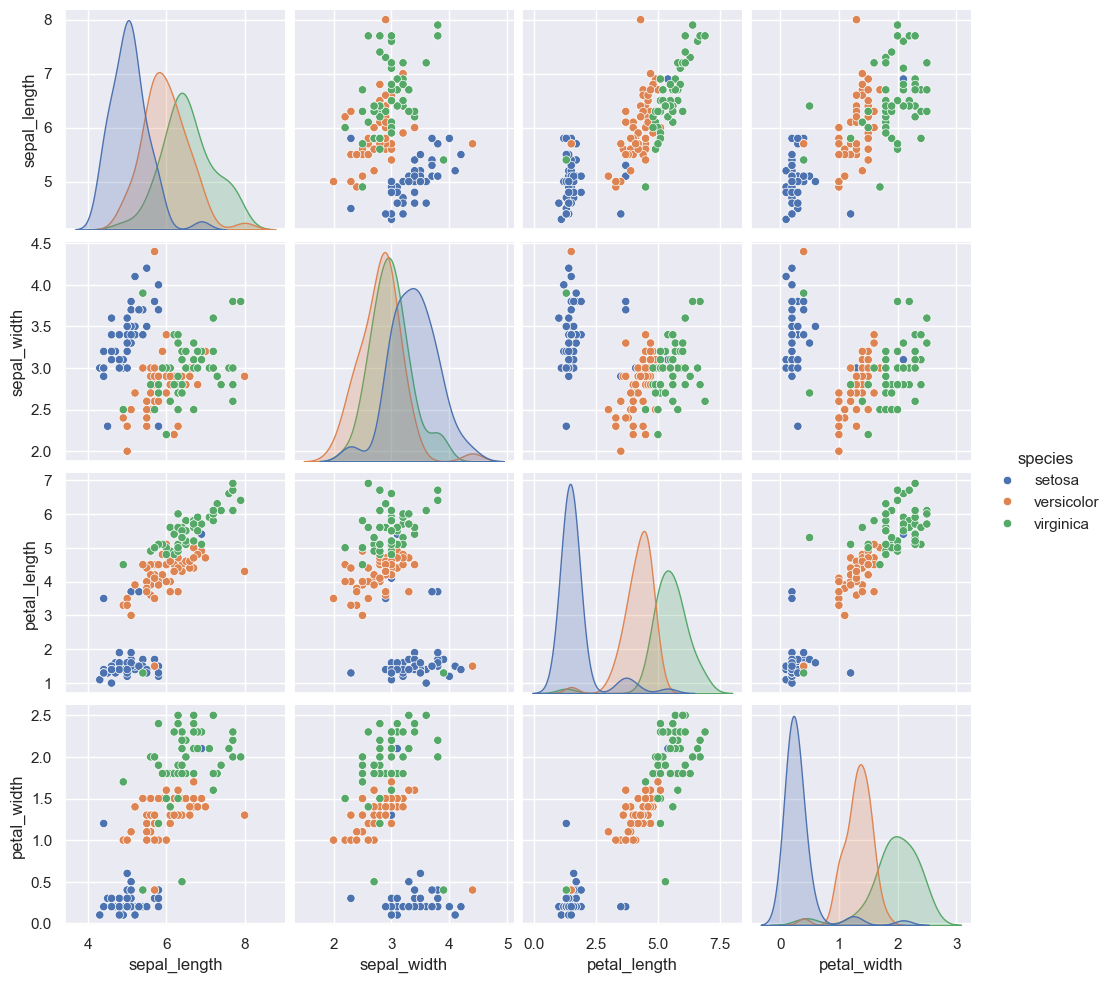

In [54]:
# Drawing pairplot
sns.pairplot(
    data=df_sans_duplicated.iloc[:, [0,1,2,3,5]],
    hue="species"
)
plt.show()

**Insight:**
- For all the features, we can see normal distribution for all three species.
- For 'sepal_length', we can see positive skewness for 'setosa' and 'versicolor'.
- For 'sepal_width', we can see positive skewness for 'versicolor' and negative skewness for 'setosa'.
- For 'petal_length', we can see positive skewness for 'setosa' and negative skewness for 'versicolor' and 'virginica'.
- For 'petal_width', we can see positive skewness for 'setosa' and negative skewness for 'versicolor' and 'virginica'.
- For all the features, 'setosa' is distributed separately from other species.
- For all the features, there is linear dependency between 'versicolor' and 'virginica'.
- For all the features, outliers can be seen.

### Parallel Coordinates

In [55]:
# Choosing feartures for parallel coordinates
df_sans_duplicated.columns.tolist()

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species_index_target',
 'species']

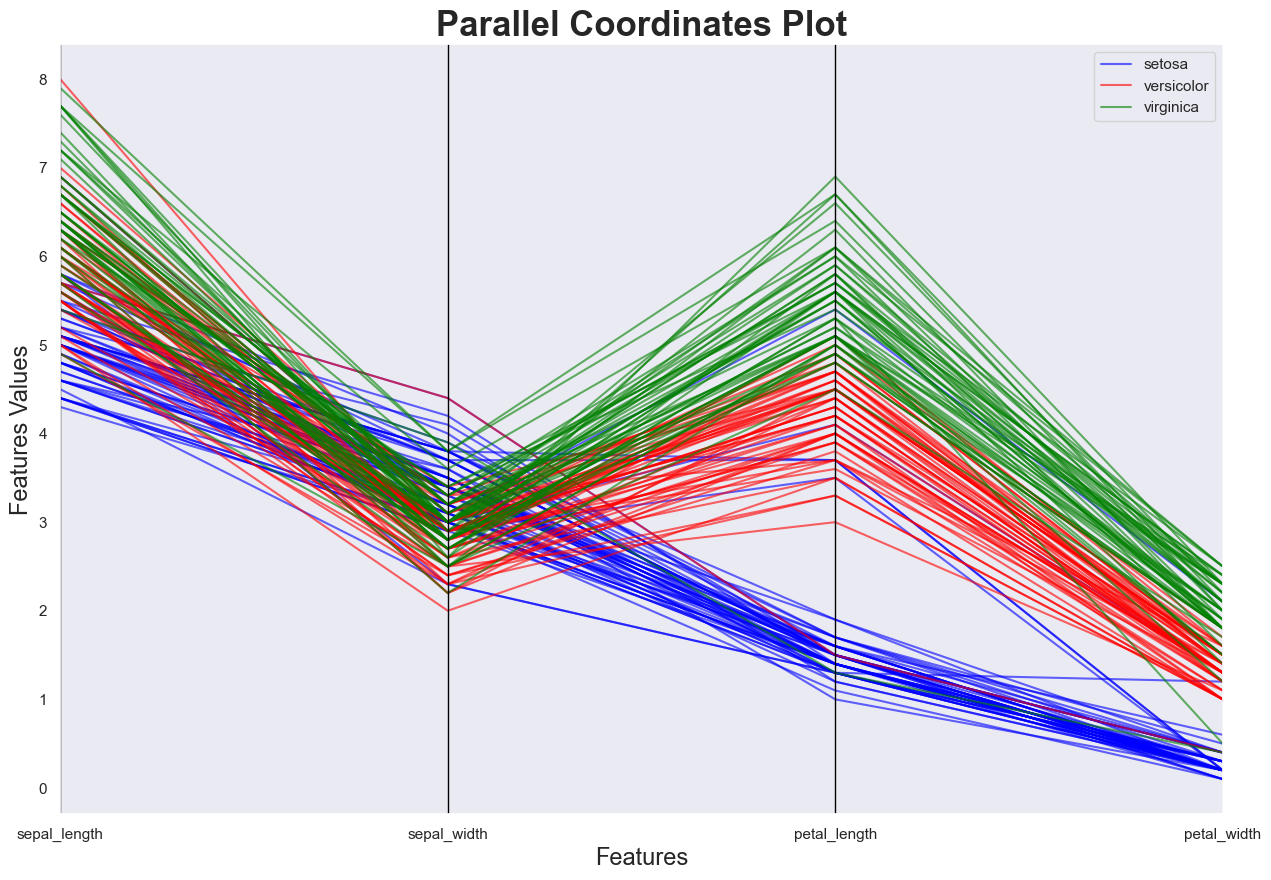

In [56]:
# Drawing parallel coordinates plot
plt.figure(figsize=[15, 10])
pd.plotting.parallel_coordinates(
    frame=df_sans_duplicated,
    class_column="species",
    cols=df_sans_duplicated.columns[:4],
    color=["blue", "red", "green"],
    alpha=0.6
)

plt.title("Parallel Coordinates Plot", fontsize=25, fontweight="bold")
plt.xlabel("Features", fontsize=17)
plt.ylabel("Features Values", fontsize=17)
plt.show()

**Here we can see:**
- For all the features, 'setosa' is distributed separately from other species.
- For all the features, 'versicolor' and 'virginica' are not separated linearly.
- For all the features, outliers can be seen.
- Feature values for 'sepal_width' is so close to each other, so range of values is low. However, for 'petal_length', values are far from each other and range of values is high.
- Values of 'setosa' is lower than the other two species for all the features except 'sepal_width'.

## Correlation Between Features

In [57]:
# Correlation matrix
correlation_matrix = df_sans_duplicated.corr(numeric_only=True)

# Styling correlation matrix
styled_correlation_matrix = (correlation_matrix
                             .style
                             .background_gradient(cmap="coolwarm")
                             .format(precision=2)
                            )
styled_correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width,species_index_target
sepal_length,1.00,-0.12,0.84,0.78,0.74
sepal_width,-0.12,1.00,-0.41,-0.36,-0.37
petal_length,0.84,-0.41,1.00,0.93,0.89
petal_width,0.78,-0.36,0.93,1.00,0.89
species_index_target,0.74,-0.37,0.89,0.89,1.00


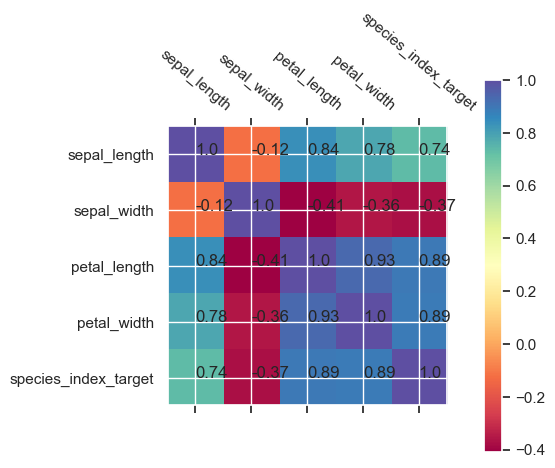

In [58]:
# Correlation heatmap using matplotlib matshow
heatmap = plt.matshow(correlation_matrix, cmap="Spectral")
plt.colorbar(heatmap, orientation="vertical", pad=0.1)
plt.xticks(ticks=range(5), labels=correlation_matrix.columns, rotation=320)
plt.yticks(ticks=range(5), labels=correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(i, j, correlation_matrix.iloc[i, j].round(2))
plt.show()

**Insight:**

These pairs have high linear dependency to each other:
- 'sepal_length' and 'petal_length',
- 'sepal_length' and 'petal_width',
- 'sepal_length'and 'species_index_target',
- 'petal_length' and 'petal_width',
- 'petal_length' and 'species_index_target',
- 'petal_width' and 'species_index_target'.

## Outliers Detection

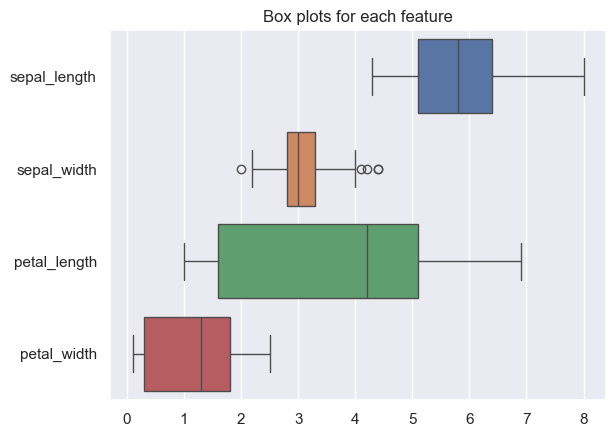

In [86]:
# Box plots for each feature as a general view
plt.title("Box plots for each feature")
sns.boxplot(
    data=df_sans_duplicated.iloc[:, :4],
    orient="h"
            )
plt.show()

In [95]:
# Box and whisker plot function
def box_and_whisker_plots(dataframe, feature_name: str, target: str) -> None:
    '''
    Drawing box and whisker plots to demonstrate distribution of a specific feature based on target values.
    '''
    plt.figure(figsize=[8, 6])
    plt.title(f"Box and whisker plot for distribution of {feature_name} based on {target}")
    sns.boxplot(
        data=dataframe,
        x=feature_name,
        y=target,
        medianprops={"linewidth" : 2, "linestyle" : "dashed"},
        hue=target
                )
    plt.show()

In [81]:
# Turning feature values into zscore values
from scipy import stats
zscores = [stats.zscore(df_sans_duplicated[feature]) for feature in df_sans_duplicated.columns[:4]]
len(zscores), type(zscores)

(4, list)

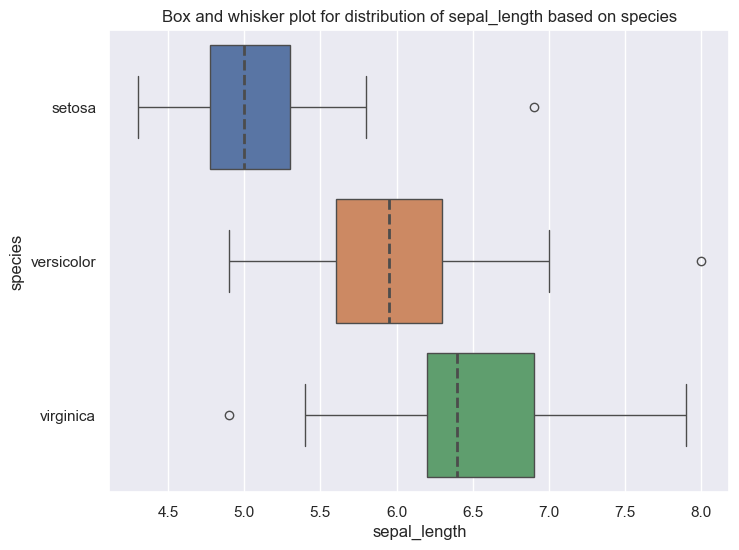

In [103]:
# Box and whisker plot function for 'sepal_length' based on species
zscore_sepal_length = zscores[0]
box_and_whisker_plots(
    dataframe=df_sans_duplicated,
    feature_name="sepal_length",
    target="species"
                     )

In [104]:
# Outliers using box plot and zscore for 'sepal_length'
outlier_sl = df_sans_duplicated[np.abs(zscore_sepal_length) > 3]
outlier_sl

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species


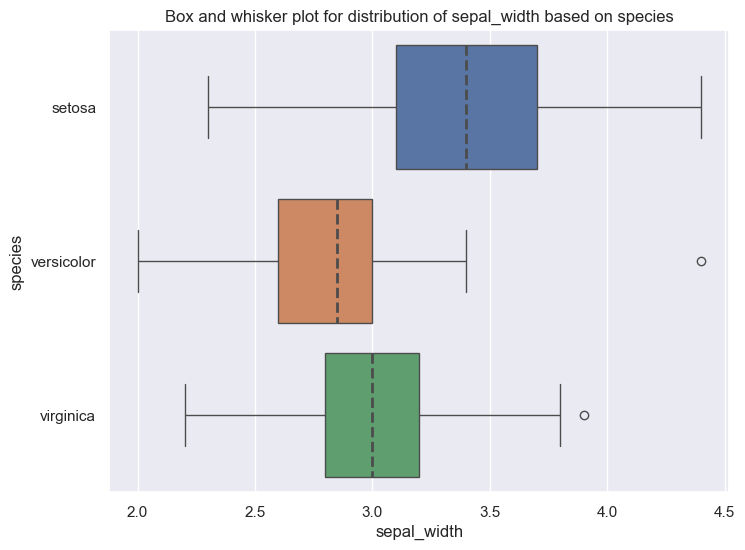

In [105]:
# Box and whisker plot function for 'sepal_width' based on species
zscore_sepal_width = zscores[1]
box_and_whisker_plots(
    dataframe=df_sans_duplicated,
    feature_name="sepal_width",
    target="species"
                     )

In [106]:
# Outliers using box plot and zscore for 'sepal_width'
outlier_sw = df_sans_duplicated[np.abs(zscore_sepal_width) > 3]
outlier_sw

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species


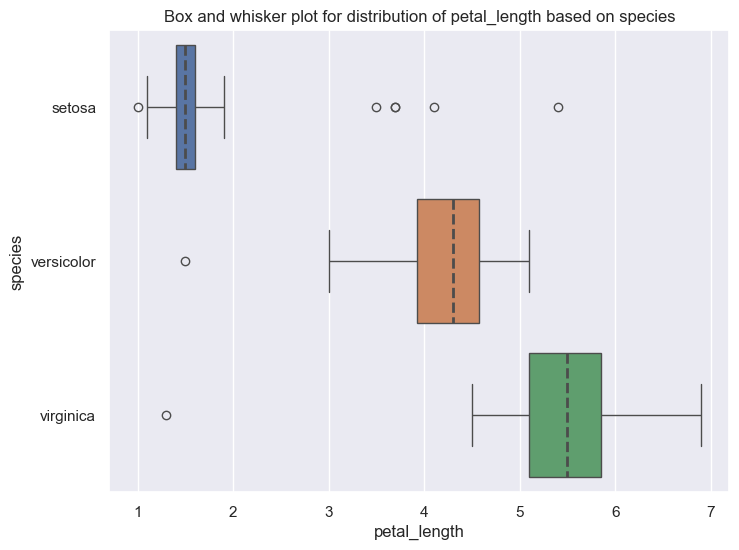

In [107]:
# Box and whisker plot function for 'petal_length' based on species
zscore_petal_length = zscores[2]
box_and_whisker_plots(
    dataframe=df_sans_duplicated,
    feature_name="petal_length",
    target="species"
                     )

In [108]:
# Outliers using box plot and zscore for 'petal_length'
outlier_pl = df_sans_duplicated[np.abs(zscore_petal_length) > 3]
outlier_pl

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species


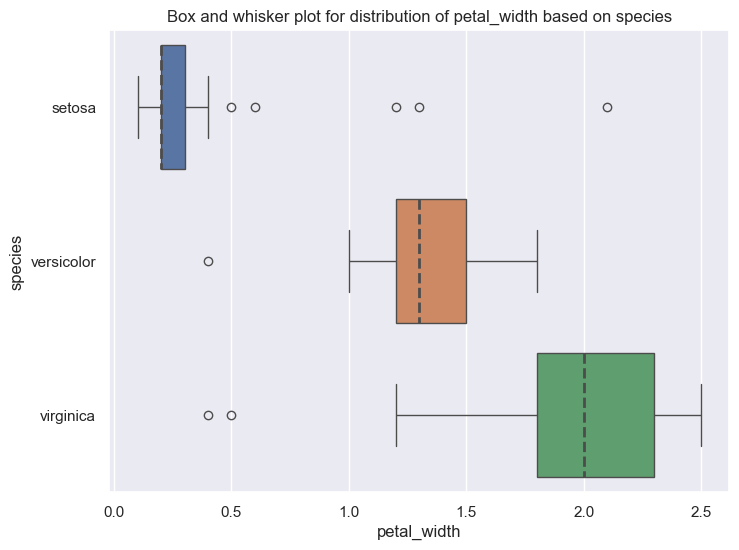

In [109]:
# Box and whisker plot function for 'petal_width' based on species
zscore_petal_width = zscores[3]
box_and_whisker_plots(
    dataframe=df_sans_duplicated,
    feature_name="petal_width",
    target="species"
                     )

In [110]:
# Outliers using box plot and zscore for 'petal_width'
outlier_pw = df_sans_duplicated[np.abs(zscore_petal_width) > 3]
outlier_pw

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species


In [140]:
# Collection of outliers using box plot and zscore
out_ind_using_boxplot_zscore = [outlier_sl.index.values, outlier_sw.index.values, outlier_pl.index.values, outlier_pw.index.values]
out_ind_using_boxplot_zscore

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

**Insight:**
- No outlier has been seen by checking box plots and zscore for each feature.

In [127]:
# Outlier indices function using 3*sigma based on normal distribution
def find_outlier_index_using_3sigma(dataframe) -> list:
    '''
    Finding outlier indices using 3*sigma based on normal distribution.
    '''
    features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
    labels = ["setosa", "versicolor", "virginica"]

    outlier_index_3sigma = list()
    for feature in features:
        for label in labels:
            df_specy = df_sans_duplicated.query("species == @label")
            selected_column = df_specy[feature]
            
            mu = selected_column.mean()
            sigma = selected_column.std()
            lower_limit = mu - 3 * sigma
            upper_limit = mu + 3 * sigma
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            # print(outlier_indices)    Debugging
            
            if len(outlier_indices) == 0: continue
            print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")
            outlier_index_3sigma.extend(outlier_indices)
            
    return outlier_index_3sigma

### Driver Code ###
out_ind_3sigma = find_outlier_index_using_3sigma(df_sans_duplicated)
out_ind_3sigma

sepal_length   ,	setosa         ,	 outlier indices=[14]
sepal_length   ,	versicolor     ,	 outlier indices=[115]
sepal_width    ,	versicolor     ,	 outlier indices=[91]
petal_length   ,	setosa         ,	 outlier indices=[14 27]
petal_length   ,	versicolor     ,	 outlier indices=[91]
petal_length   ,	virginica      ,	 outlier indices=[146]
petal_width    ,	setosa         ,	 outlier indices=[14 27]
petal_width    ,	versicolor     ,	 outlier indices=[91]
petal_width    ,	virginica      ,	 outlier indices=[146 172]


[14, 115, 91, 14, 27, 91, 146, 14, 27, 91, 146, 172]

In [129]:
# Outlier indices function using iqr
def find_outlier_index_using_iqr(dataframe) -> list:
    '''
    Finding outlier indices using iqr.
    '''
    features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
    labels = ["setosa", "versicolor", "virginica"]

    outlier_index_iqr = list()
    for feature in features:
        for label in labels:
            df_specy = df_sans_duplicated.query("species == @label")
            selected_column = df_specy[feature]
            
            q1 = selected_column.quantile(0.25)    # First quartile
            q3 = selected_column.quantile(0.75)    # Third quartile
            iqr = q3 - q1
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            
            if len(outlier_indices) == 0: continue
            print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")
            outlier_index_iqr.extend(outlier_indices)
            
    return outlier_index_iqr

### Driver Code ###
out_ind_iqr = find_outlier_index_using_iqr(df_sans_duplicated)
out_ind_iqr

sepal_length   ,	setosa         ,	 outlier indices=[14]
sepal_length   ,	versicolor     ,	 outlier indices=[115]
sepal_length   ,	virginica      ,	 outlier indices=[119]
sepal_width    ,	versicolor     ,	 outlier indices=[91]
sepal_width    ,	virginica      ,	 outlier indices=[146]
petal_length   ,	setosa         ,	 outlier indices=[14 22 27 50 52 60]
petal_length   ,	versicolor     ,	 outlier indices=[91]
petal_length   ,	virginica      ,	 outlier indices=[146]
petal_width    ,	setosa         ,	 outlier indices=[14 19 27 43 54]
petal_width    ,	versicolor     ,	 outlier indices=[91]
petal_width    ,	virginica      ,	 outlier indices=[146 172]


[14,
 115,
 119,
 91,
 146,
 14,
 22,
 27,
 50,
 52,
 60,
 91,
 146,
 14,
 19,
 27,
 43,
 54,
 91,
 146,
 172]

In [141]:
# Turning outlier list into set and obtaining intersection of two sets
final_outlier_indices = set(out_ind_3sigma) & set(out_ind_iqr)
final_outlier_indices

{14, 27, 91, 115, 146, 172}

In [143]:
# Dropping outliers
df_clean = df_sans_duplicated.drop(index=final_outlier_indices)
df_clean.shape

(155, 6)

In [144]:
df_clean.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species_index_target,species
169,6.4,2.7,5.3,1.9,2,virginica
127,6.4,2.8,5.6,2.2,2,virginica
118,6.1,2.6,5.6,1.4,2,virginica
34,4.8,3.1,1.6,0.2,0,setosa
40,5.1,3.4,1.5,0.2,0,setosa


## Feature Scalling

In [147]:
# Investigating feature ranges for checking of feature scalling
print("Feature Ranges:")
for col in df_sans_duplicated.columns[:4]:
    print(f"{col}: {round(df_sans_duplicated[col].max() - df_sans_duplicated[col].min(), 1)}")

Feature Ranges:
sepal_length: 3.7
sepal_width: 2.4
petal_length: 5.9
petal_width: 2.4


**Note:**

Because all the features are in a same order of magnitude, there is no need for scalling.

## Distribution Plot

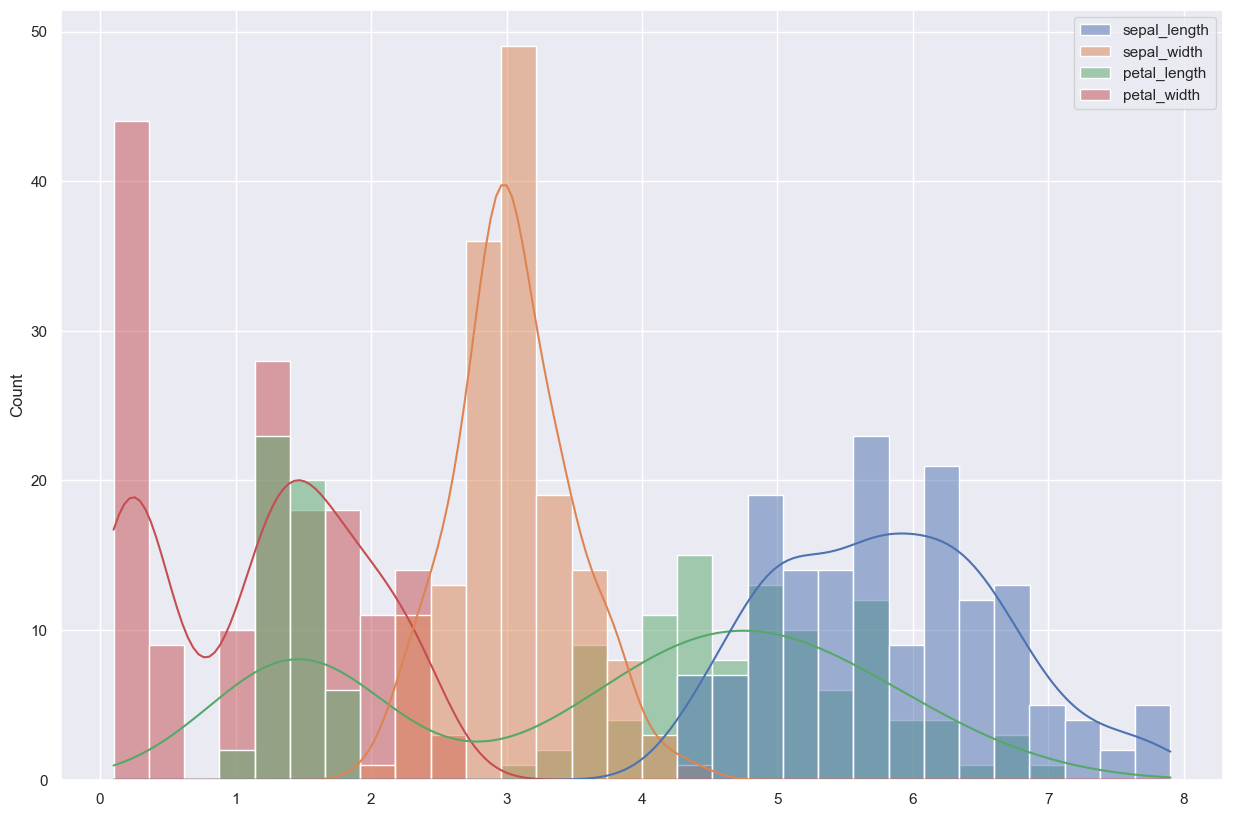

In [148]:
# Drawing distribution plot
plt.figure(figsize=[15, 10])
sns.histplot(
    data=df_clean.iloc[:, :4],
    bins=30,
    kde=True,
            )
plt.show()

**Insight**
- Distribution plot for 'sepal_length' and 'sepal_width' is very similar to normal distribution.
- Distribution plot for 'petal_length' and 'petal_width' has negative skewness.